In [201]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [176]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
train_x = pd.read_csv('data/classificaition_train_x.csv')
train_y = pd.read_csv('data/classificaition_train_y.csv')
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')

In [ ]:
train_x = train_x.drop(columns=['f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f9', 'f12', 'f17', 'f20'])
val_x = val_x.drop(columns=['f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f9', 'f12', 'f17', 'f20'])

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

val_y_prob = clf.predict_proba(val_x)

from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, classification_report
print(log_loss(val_y, val_y_prob))

In [ ]:
train_x = pd.read_csv('data/classificaition_train_x.csv')
train_y = pd.read_csv('data/classificaition_train_y.csv')
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')

In [ ]:
from sklearn import tree
dropped_train_x = train_x.drop(columns=['f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f9', 'f12', 'f17', 'f20'])
dropped_val_x = val_x.drop(columns=['f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f9', 'f12', 'f17', 'f20'])
clf = tree.DecisionTreeRegressor()
clf = clf.fit(dropped_train_x, train_y)

val_y_prob = clf.predict(dropped_val_x)

from sklearn.metrics import log_loss
print(log_loss(val_y, val_y_prob))

In [ ]:
def normalize_Data(data, name):
    catags = ['f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f9', 'f12', 'f17', 'f20']
    cols = list(data.columns)
    quant = [i for i in cols if i not in catags]
    dummies = []
    for colName in catags:
        dummies.append(pd.get_dummies(data[colName], prefix=colName))
    df_numerical = data[quant]
    df_names = df_numerical.keys().tolist()
    x_scaled =  preprocessing.MinMaxScaler().fit_transform(df_numerical)
    df_temp = pd.DataFrame(x_scaled)
    df_temp.columns = df_names
    result = [df_temp]
    for i in dummies:
        result.append(i)
    norm_df = pd.concat([df_temp,dummies[0],
                        dummies[1],
                         dummies[2],
                         dummies[3],
                         dummies[4],
                         dummies[5],
                         dummies[6],
                         dummies[7],
                         dummies[8],
                         dummies[9]], axis=1)
    norm_df.to_csv("data/normed_data_({}).csv".format(name), index = False)
    return norm_df

In [ ]:
normed_train_x = normalize_Data(train_x, "train_x")
normed_val_x = normalize_Data(val_x, "val_x")

In [ ]:
def check_missing(l1, l2):
    missing = list(set(l1.keys())-set(l2.keys()))
    for col in missing:
        l2.insert(l1.columns.get_loc(col), col, 0)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(normed_train_x, train_y)
check_missing(normed_val_x, normed_train_x)
check_missing(normed_train_x, normed_val_x)
val_y_prob = clf.predict_proba(normed_val_x)

from sklearn.metrics import log_loss
print(log_loss(val_y, val_y_prob))

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(normed_train_x, train_y)

check_missing(normed_val_x, normed_train_x)
check_missing(normed_train_x, normed_val_x)

val_y_prob = clf.predict(normed_val_x)

from sklearn.metrics import log_loss
print(log_loss(val_y, val_y_prob))

In [ ]:
train_x = pd.read_csv('data/classificaition_train_x.csv')
train_y = pd.read_csv('data/classificaition_train_y.csv')
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')

In [ ]:
train_data = pd.concat([train_x, train_y], axis=1)
train_data['y']

In [ ]:
from matplotlib.pyplot import boxplot
train_data.boxplot(column = 'f5', by = 'y')
#age

In [ ]:
#job
train_data.groupby('f1').y.mean()

In [ ]:
#default
train_data.groupby('f2').y.mean()

In [ ]:
train_data.f2.value_counts()

In [ ]:
train_data.groupby('f3').y.mean()

In [ ]:
print(train_data.f3.value_counts())
train_data['f3'] = train_data.f3.map({'c0':0, 'c2':1, 'c3':1})

In [ ]:
train_data.groupby('f7').y.mean()

In [ ]:
train_data.groupby('f8').y.mean()

In [ ]:
train_data.groupby('f9').y.mean()

In [ ]:
train_data.groupby('f12').y.mean()

In [ ]:
train_data.groupby('f17').y.mean()

In [ ]:
useful = ['f12', 'f13', 'f16']
#euribor3m f16
train_data.boxplot(column = 'f16', by='y')

In [ ]:
train_x = pd.read_csv('data/classificaition_train_x.csv')
train_y = pd.read_csv('data/classificaition_train_y.csv')
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')

In [ ]:
catags = ['f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f9', 'f12', 'f17', 'f20', 'y']
cols = list(train_x.columns)
quant = [i for i in cols if i not in catags]


In [ ]:
train = pd.concat([train_x, train_y], axis=1)
def encoder(df):
    temp = df.copy()
    enc = preprocessing.LabelEncoder()
    
    for col in catags:
        temp[col] = enc.fit_transform(temp[col])
    return temp;

/Users/unajun/.virtualenvs/CSED490_Project/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


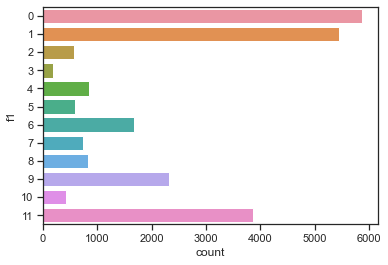

In [216]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.countplot(y='f1', data=train)
train = train[train.f1 != 'c11']

0    18271
2     5064
1        3
Name: f3, dtype: int64


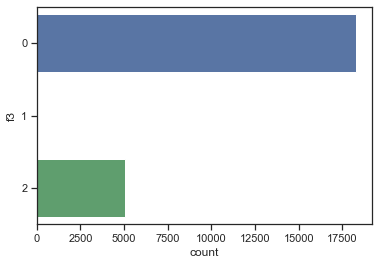

In [217]:
sns.countplot(y='f3', data=train)
print(train.f3.value_counts())
train = train[train.f3 != 'c1']

6    6744
3    5492
2    3483
5    3021
0    2261
1    1366
7     961
4      10
Name: f4, dtype: int64


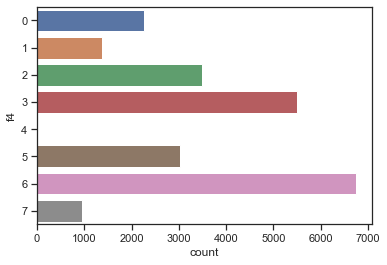

In [218]:
sns.countplot(y='f4', data=train)
print(train.f4.value_counts())
train = train[train.f3 != 'c4']

1    14198
2     6478
0     2614
3       48
Name: f9, dtype: int64


/Users/unajun/.virtualenvs/CSED490_Project/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


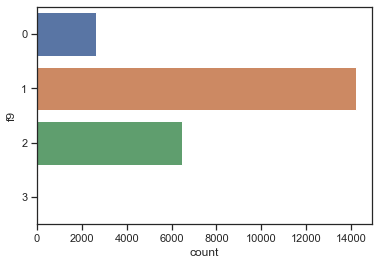

In [221]:
sns.countplot(y='f9', data=train)
print(train.f9.value_counts())
train = train[train.f9 != '3']

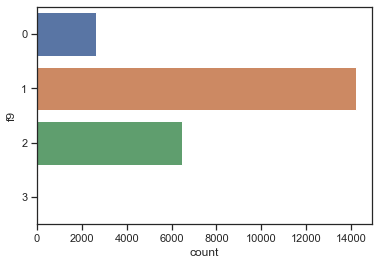

In [222]:
sns.countplot(y='f9', data=train)

In [ ]:
sns.boxplot(x='y', y='f5', data=train)

In [ ]:
sns.boxplot(x='y', y='f5', data=train)

In [ ]:
sns.boxplot(x='y', y='f10', data=train)

In [ ]:
sns.boxplot(x='y', y='f11', data=train)

In [ ]:
sns.boxplot(x='y', y='f13', data=train)

In [ ]:
sns.boxplot(x='y', y='f14', data=train)

In [ ]:
sns.boxplot(x='y', y='f15', data=train)

In [ ]:
sns.boxplot(x='y', y='f16', data=train)

In [ ]:
sns.boxplot(x='y', y='f18', data=train)

In [ ]:
sns.boxplot(x='y', y='f19', data=train)

In [ ]:
train = encoder(train) 
from scipy import stats
train = train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]

In [ ]:
train.describe()


In [ ]:
sns.countplot(hue = 'y', x = 'f1', data = train)
print("No Problem!")

In [ ]:
sns.countplot(hue = 'y', x = 'f2', data = train)
print("No Problem!")

Drop it!


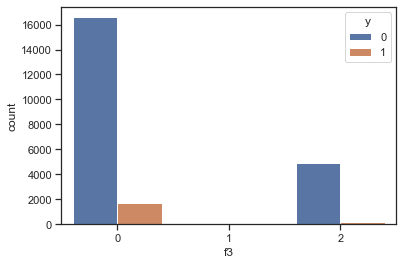

In [187]:
drop = []
sns.countplot(hue = 'y', x = 'f3', data = train)
print("Drop it!")
drop = [ 'f4', 'f6', 'f7', 'f9', 'f11', 'f13', 'f14', 'f15','f17', 'f19']
save = train
save = save.drop(drop, axis=1)

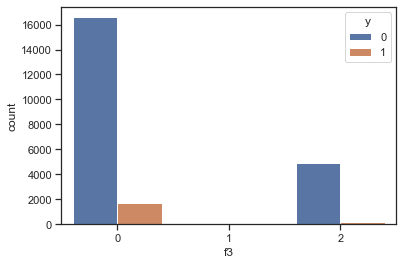

In [215]:
sns.countplot(hue = 'y', x = 'f3', data = train)

In [188]:
save.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23338 entries, 0 to 26359
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f2      23338 non-null  int64  
 1   f5      23338 non-null  int64  
 2   f8      23338 non-null  int64  
 3   f10     23338 non-null  float64
 4   f12     23338 non-null  int64  
 5   f16     23338 non-null  float64
 6   f18     23338 non-null  int64  
 7   f20     23338 non-null  int64  
 8   y       23338 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 2.4 MB


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))



In [179]:
save.shape

(23338, 10)

In [189]:
X = save.drop('y', axis=1).values
y = save['y'].values
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.fit_transform(X)
pca = PCA(n_components=8)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [194]:
cnt = 0
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=8)
    cv_results = model_selection.cross_val_score(model, X_train, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}/{}\t{}: {}".format(cnt, len(models), name, cv_results.mean())
    cnt+=1;
    print(msg)

0/8	LR: 0.9243296017319944
1/8	LDA: 0.9203018577961011
2/8	KNN: 0.9221868279187755
3/8	Decison-Tree: 0.9033762194533099
4/8	Gaussian: 0.9216301892923782
5/8	SVM: 0.9265576541570614
6/8	RandForest: 0.925700579876938
7/8	ADA: 0.9247579479607502


In [204]:
def encoder(df, catags):
    temp = df.copy()
    enc = preprocessing.LabelEncoder()
    
    for col in catags:
        temp[col] = enc.fit_transform(temp[col])
    return temp;

In [214]:
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')
val_x = encoder(pd.DataFrame(val_x), ['f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f9', 'f12', 'f17', 'f20'])
scaler.fit(val_x)
val_x = scaler.fit_transform(val_x)
pca.fit(val_x)
val_x = pca.fit_transform(val_x)
svc = SVC()
svc.fit(X_train, y)
predictions = svc.predict(val_x)
print("Accuracy : ", accuracy_score(val_y, predictions))
print("Confusion Matrix : \n",confusion_matrix(val_y, predictions))
print("Classification Report: \n",classification_report(val_y, predictions))

lr = LogisticRegression()
lr.fit(X_train, y)
predictions = lr.predict(val_x)
print("Accuracy : ", accuracy_score(val_y, predictions))
print("Confusion Matrix : \n",confusion_matrix(val_y, predictions))
print("Classification Report: \n",classification_report(val_y, predictions))

Accuracy :  0.8412746585735964
Confusion Matrix : 
 [[5508  332]
 [ 714   36]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      5840
           1       0.10      0.05      0.06       750

    accuracy                           0.84      6590
   macro avg       0.49      0.50      0.49      6590
weighted avg       0.80      0.84      0.82      6590

Accuracy :  0.8575113808801214
Confusion Matrix : 
 [[5472  368]
 [ 571  179]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      5840
           1       0.33      0.24      0.28       750

    accuracy                           0.86      6590
   macro avg       0.62      0.59      0.60      6590
weighted avg       0.84      0.86      0.85      6590



,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
0,c0,c1,c0,c6,34,2,c1,c2,c1,899.1,5191.0,c0,65.7958,-29.12,1.1,2.9142,c1,157,0,c4
1,c7,c0,c0,c3,37,2,c1,c0,c1,899.1,5099.1,c1,65.1525,-37.68,-1.8,0.8430,c1,345,0,c3
2,c0,c0,c0,c3,42,1,c0,c3,c0,899.1,5099.1,c1,65.0251,-36.96,-1.8,0.7962,c0,304,1,c4
3,c1,c1,c2,c2,40,1,c2,c2,c0,899.1,5228.1,c2,66.1255,-33.44,1.4,2.9772,c1,104,0,c5
4,c1,c0,c0,c0,33,1,c0,c4,c2,899.1,5195.8,c1,65.2400,-33.60,-0.1,2.4126,c1,451,0,c10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,c4,c1,c2,c2,33,1,c0,c4,c1,899.1,5191.0,c0,65.7958,-29.12,1.1,2.9184,c1,127,0,c4
6586,c7,c1,c0,c2,50,1,c1,c1,c1,899.1,5191.0,c1,65.7958,-29.12,1.1,2.9142,c1,369,0,c4
6587,c9,c1,c0,c5,35,6,c0,c1,c1,899.1,5228.1,c1,66.1255,-33.44,1.4,2.9184,c1,589,0,c5
6588,c1,c0,c0,c2,27,1,c0,c2,c1,899.1,5228.1,c0,65.7426,-34.16,1.4,2.9742,c1,128,0,c6
